## Problem Statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to **build a predictive model and predict the sales of each product at a particular outlet**.



## Import Lib

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['lines.linewidth'] = 2


font = {'family': 'serif',
        'color':  '#2E86C1',
        'weight': 'normal',
        'size': 20,
        }

base_color = sns.color_palette()[0]

## Import Dataset

In [ ]:
file_path = "/content/drive/MyDrive/Colab Notebooks/Data Sets/Big_Mart_Sales_train.csv"

df = pd.read_csv(file_path)

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Assessing

In [ ]:
# check nu of rows and cols
df.shape

(8523, 12)

In [ ]:
# check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# check the null value
print(df.isnull().sum())
print('='*55)
print(df.isnull().mean())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64


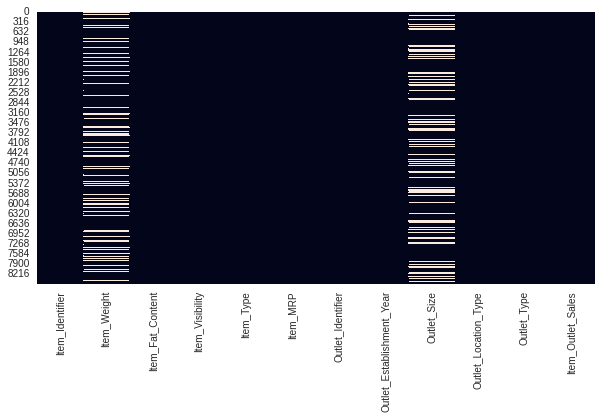

In [ ]:
sns.heatmap(df.isnull(), cbar=False);

In [ ]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
# check the unique value 
cat_columns = df.select_dtypes(object).columns
for col in cat_columns:
    print(col, df[col].unique())
    print('='*55)

Item_Identifier ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size ['Medium' nan 'High' 'Small']
Outlet_Location_Type ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [ ]:
# take a copy of data
df_copy = df.copy()
df_copy.fillna('blank', inplace=True)

In [ ]:
# try to find the null value of outlet_size
df_copy.groupby(['Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size'], dropna=False)['Item_Identifier'].count()

Outlet_Type        Outlet_Location_Type  Outlet_Size
Grocery Store      Tier 1                Small           528
                   Tier 3                blank           555
Supermarket Type1  Tier 1                Medium          930
                                         Small           930
                   Tier 2                Small           930
                                         blank          1855
                   Tier 3                High            932
Supermarket Type2  Tier 3                Medium          928
Supermarket Type3  Tier 3                Medium          935
Name: Item_Identifier, dtype: int64

In [ ]:
# try to find the null value of outlet_size
df_copy.groupby(['Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size'], dropna=False)['Item_Identifier'].count()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small           528
                      Supermarket Type1  Medium          930
                                         Small           930
Tier 2                Supermarket Type1  Small           930
                                         blank          1855
Tier 3                Grocery Store      blank           555
                      Supermarket Type1  High            932
                      Supermarket Type2  Medium          928
                      Supermarket Type3  Medium          935
Name: Item_Identifier, dtype: int64

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# try to find any relation with item_weight to fill the nan
df[df.columns[:]].corr()['Item_Weight']

Item_Weight                  1.000000
Item_Visibility             -0.014048
Item_MRP                     0.027141
Outlet_Establishment_Year   -0.011588
Item_Outlet_Sales            0.014123
Name: Item_Weight, dtype: float64

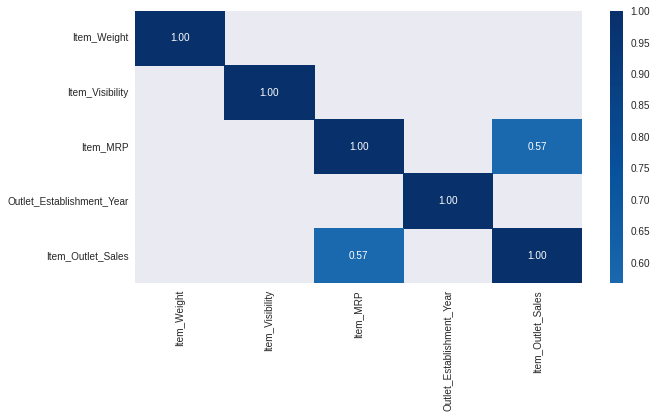

In [ ]:
# check the correlation 
corr = df.corr()
kot = corr[corr.apply(lambda x: abs(x)>=.4)]
sns.heatmap(kot, annot = True, fmt = '.2f', cmap = 'Blues', center = 0)

- From the correlation above we can realize that there is not multicollinearity problem

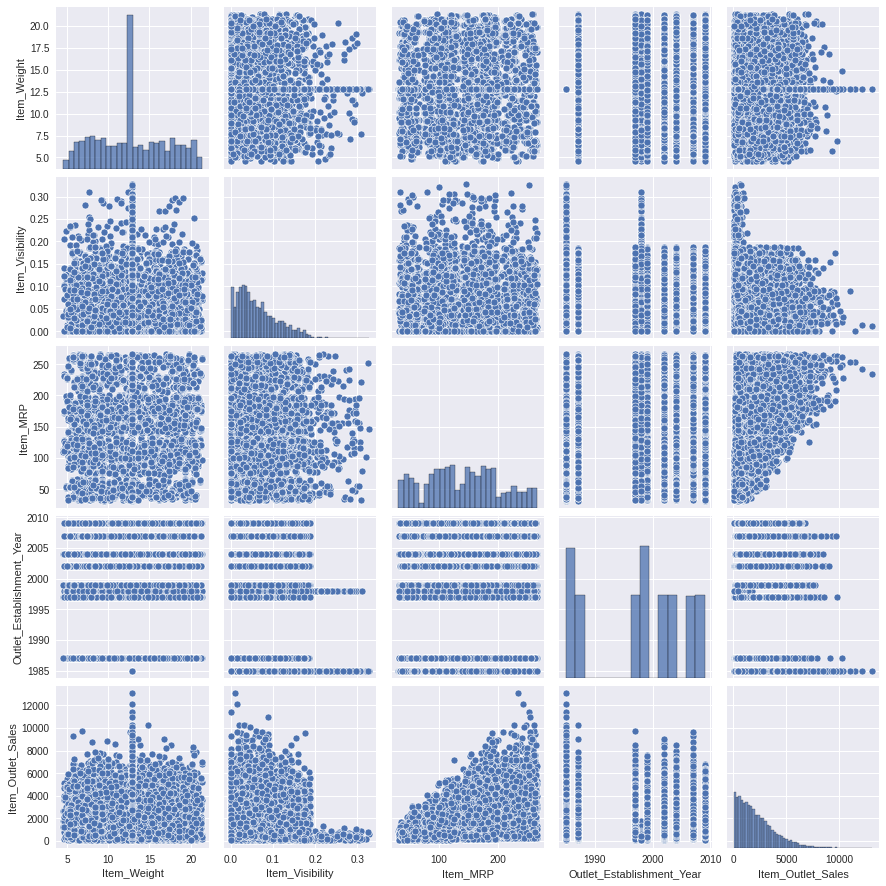

In [ ]:
# check the correlation 
sns.pairplot(df)

## Observation



* NULL values
    * `Item_Weight` 1463. fill nan with the mean of item_weight
    * `Outlet_Size` 2410. fill nan with small according to most freq in groupBy

* Standardization of Low Fat in `Item_Fat_Content`


## Data Wrangling

In [ ]:
# fill the nan of item_weight with mean value
df.Item_Weight.fillna(df.Item_Weight.mean(), inplace=True)

In [ ]:
# fill the nan of outlet_size with Small
df.Outlet_Size.fillna('Small', inplace=True)

In [ ]:
# check
print(df.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [ ]:
# map Low Fat and low fat to LF 
lf = {'Low Fat':'LF', 'low fat':'LF'}
reg = {'Regular':'reg'}
df['Item_Fat_Content']= df['Item_Fat_Content'].replace(lf)
df['Item_Fat_Content']= df['Item_Fat_Content'].replace(reg)

In [ ]:
df.Item_Fat_Content.unique()

array(['LF', 'reg'], dtype=object)

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# convert Outlet_Establishment_Year to datetime  
df['Outlet_Establishment_Year'] =\
        pd.to_datetime(df.Outlet_Establishment_Year, format="%Y").dt.year


In [ ]:
# export the data after clean
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/big_mart_sales.csv',index=False)

## Outlier Detection


In [ ]:
# import data after preprocessing 
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/big_mart_sales.csv')

In [ ]:
# check data
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


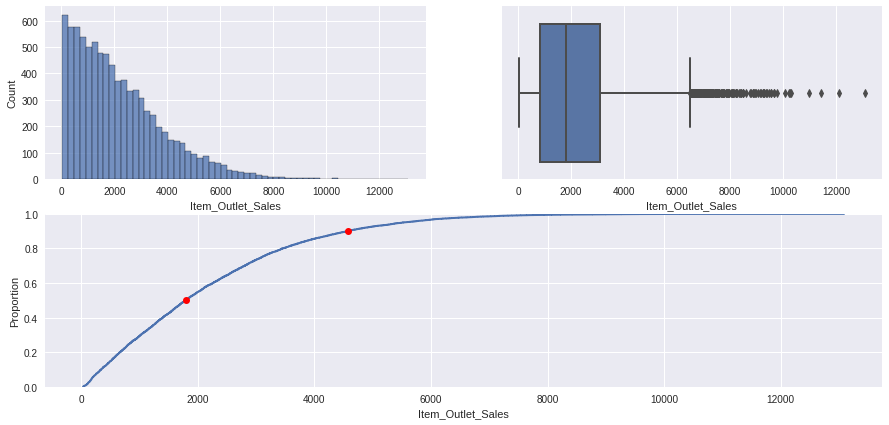

In [ ]:
plt.figure(figsize=(15,7))

plt.subplot2grid((2,2), (0,0))

sns.histplot(df['Item_Outlet_Sales']);

plt.subplot2grid((2,2), (0,1)) 

sns.boxplot(x=df['Item_Outlet_Sales']);

plt.subplot2grid((2,2), (1,0), colspan=2)

percentiles = np.array([50 , 90])
pct_val = np.percentile(df['Item_Outlet_Sales'], percentiles)
sns.ecdfplot(x=df['Item_Outlet_Sales']);
plt.plot(pct_val, (percentiles/100), marker='o', color='red', linestyle='none');

In [ ]:
df_outlier = df[df['Item_Outlet_Sales'] > pct_val[1]]
df_outlier.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,851.000000,851.000000,851.000000,851.000000,851.000000
mean,12.984119,0.058380,211.468335,1995.356052,5851.325796
std,3.669217,0.041799,36.723025,9.056497,1181.776116
min,4.615000,0.000000,98.904200,1985.000000,4572.048600
25%,11.225000,0.025717,183.393700,1985.000000,4975.523400
50%,12.857645,0.053212,216.382400,1997.000000,5522.811000
75%,15.100000,0.081419,243.964400,2004.000000,6338.416000
max,21.350000,0.186357,266.888400,2009.000000,13086.964800


In [ ]:
# new dataframe after remove the outliers
df_new = df[df['Item_Outlet_Sales'] <= pct_val[1]]
df_new.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7672.000000,7672.000000,7672.000000,7672.000000,7672.000000
mean,12.843616,0.066992,133.175434,1998.106491,1774.198013
std,4.283421,0.052504,59.555557,8.247286,1191.837071
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.285000,0.027163,89.177050,1987.000000,755.017200
50%,12.857645,0.053996,126.386200,1999.000000,1593.925200
75%,16.200000,0.096695,176.837000,2004.000000,2659.871000
max,21.350000,0.328391,266.888400,2009.000000,4570.051200


## Feature Scaling

In [ ]:
# import lib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_new.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# create column how many years the outliet opens
df_new['how_many_year_open'] = (2021 - df_new['Outlet_Establishment_Year'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# check the unique value 
cat_columns = df_new.select_dtypes(object).columns
for col in cat_columns:
    print(col, df_new[col].unique())
    print('='*55)

Item_Identifier ['FDA15' 'DRC01' 'FDN15' ... 'NCW05' 'FDN51' 'FDR39']
Item_Fat_Content ['LF' 'reg']
Item_Type ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Others'
 'Starchy Foods' 'Seafood']
Outlet_Identifier ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT046' 'OUT035'
 'OUT019' 'OUT017']
Outlet_Size ['Medium' 'Small' 'High']
Outlet_Location_Type ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [ ]:
# Make feature scaling for categorical data
df_new[['Item_Identifier', 'Item_Type', 'Outlet_Identifier']] \
= OrdinalEncoder(dtype=int).fit_transform(df_new[['Item_Identifier', 'Item_Type', 
                                              'Outlet_Identifier']])

In [ ]:
dummy_var = pd.get_dummies(df_new[['Item_Fat_Content', 'Outlet_Size',
                   'Outlet_Location_Type', 'Outlet_Type']],prefix_sep='_',  drop_first=True, 
                   dtype=np.int)
df_new = pd.concat([df_new,dummy_var],axis=1)

In [ ]:
df_new.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [ ]:
# check the data after feature scaling for cat data
df_new.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,how_many_year_open,item_fat_content_reg,outlet_size_medium,outlet_size_small,outlet_location_type_tier_2,outlet_location_type_tier_3,outlet_type_supermarket_type1,outlet_type_supermarket_type2,outlet_type_supermarket_type3
0,156,9.30,LF,0.016047,4,249.8092,9,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22,0,1,0,0,0,1,0,0
1,8,5.92,reg,0.019278,14,48.2692,3,2009,Medium,Tier 3,Supermarket Type2,443.4228,12,1,1,0,0,1,0,1,0
2,662,17.50,LF,0.016760,10,141.6180,9,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22,0,1,0,0,0,1,0,0
3,1121,19.20,reg,0.000000,6,182.0950,0,1998,Small,Tier 3,Grocery Store,732.3800,23,1,0,1,0,1,0,0,0
4,1296,8.93,LF,0.000000,9,53.8614,1,1987,High,Tier 3,Supermarket Type1,994.7052,34,0,0,0,0,1,1,0,0


---
feature scaling to float data

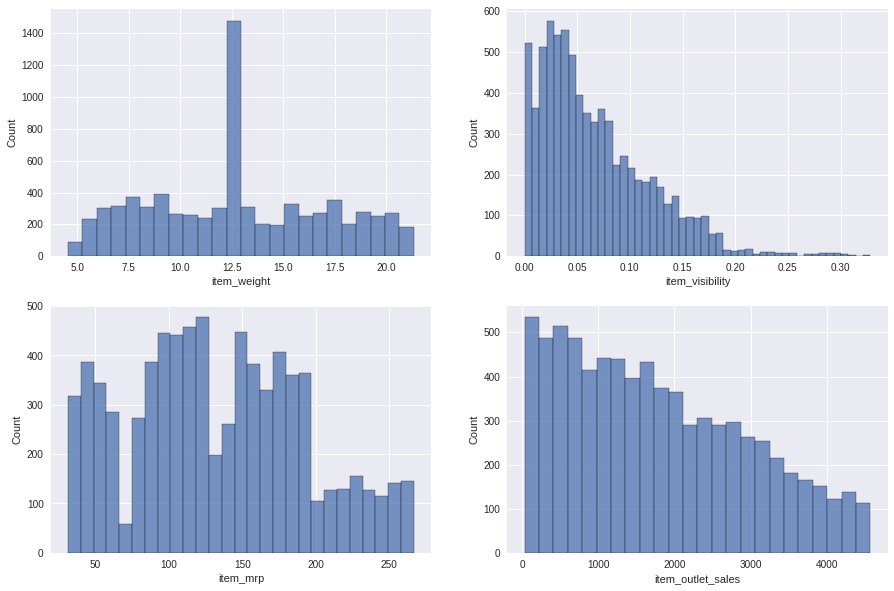

In [ ]:
plt.figure(figsize=(15,10))

# check the distribution
float_col = df_new.select_dtypes(float).columns
count = 1
for col in float_col:
    plt.subplot(2,2,count)
    sns.histplot(df_new[col])
    count +=1 

In [ ]:
# fit scaler on training data
df_new['item_weight_transform'] = MinMaxScaler().fit_transform(df_new[['item_weight']])
df_new['item_visibility_transform'] = MinMaxScaler().fit_transform(df_new[['item_visibility']])
df_new['item_mrp_transform'] = MinMaxScaler().fit_transform(df_new[['item_mrp']])


In [ ]:
df_new.describe()

,item_identifier,item_weight,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,item_outlet_sales,how_many_year_open,item_fat_content_reg,outlet_size_medium,outlet_size_small,outlet_location_type_tier_2,outlet_location_type_tier_3,outlet_type_supermarket_type1,outlet_type_supermarket_type2,outlet_type_supermarket_type3,item_weight_transform,item_visibility_transform,item_mrp_transform
count,7672.000000,7672.000000,7672.000000,7672.000000,7672.000000,7672.000000,7672.000000,7672.000000,7672.000000,7672.000000,7672.000000,7672.000000,7672.000000,7672.000000,7672.000000,7672.00000,7672.000000,7672.000000,7672.000000,7672.000000
mean,780.603624,12.843616,0.066992,7.217414,133.175434,4.668405,1998.106491,1774.198013,22.893509,0.350104,0.308394,0.580553,0.329771,0.382299,0.659932,0.11353,0.085375,0.493517,0.204000,0.432454
std,449.978345,4.283421,0.052504,4.221376,59.555557,2.877194,8.247286,1191.837071,8.247286,0.477033,0.461860,0.493501,0.470160,0.485981,0.473763,0.31726,0.279458,0.255041,0.159883,0.252784
min,0.000000,4.555000,0.000000,0.000000,31.290000,0.000000,1985.000000,33.290000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,395.000000,9.285000,0.027163,4.000000,89.177050,2.000000,1987.000000,755.017200,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.281631,0.082715,0.245702
50%,787.000000,12.857645,0.053996,6.000000,126.386200,5.000000,1999.000000,1593.925200,22.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.494352,0.164427,0.403637
75%,1169.000000,16.200000,0.096695,10.000000,176.837000,7.000000,2004.000000,2659.871000,34.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.693361,0.294450,0.617776
max,1556.000000,21.350000,0.328391,15.000000,266.888400,9.000000,2009.000000,4570.051200,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


## Build the model

In [ ]:
from sklearn.model_selection import cross_validate

### MLR

In [ ]:
import statsmodels.api as sms

# calculate the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_new.head(2)

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,how_many_year_open,item_fat_content_reg,outlet_size_medium,outlet_size_small,outlet_location_type_tier_2,outlet_location_type_tier_3,outlet_type_supermarket_type1,outlet_type_supermarket_type2,outlet_type_supermarket_type3,item_weight_transform,item_visibility_transform,item_mrp_transform
0,156,9.30,LF,0.016047,4,249.8092,9,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22,0,1,0,0,0,1,0,0,0.282525,0.048866,0.927507
1,8,5.92,reg,0.019278,14,48.2692,3,2009,Medium,Tier 3,Supermarket Type2,443.4228,12,1,1,0,0,1,0,1,0,0.081274,0.058705,0.072068


In [ ]:
df_new.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales', 'how_many_year_open',
       'item_fat_content_reg', 'outlet_size_medium', 'outlet_size_small',
       'outlet_location_type_tier_2', 'outlet_location_type_tier_3',
       'outlet_type_supermarket_type1', 'outlet_type_supermarket_type2',
       'outlet_type_supermarket_type3', 'item_weight_transform',
       'item_visibility_transform', 'item_mrp_transform'],
      dtype='object')

In [ ]:
df_new1 = df_new.copy()
df_new1['intercept'] = 1
lm_bath = sms.OLS(df_new1['item_outlet_sales'], 
        df_new1[['intercept', 'item_identifier', 'item_weight_transform', 'item_visibility_transform',
       'item_mrp_transform', 'item_type', 'outlet_identifier',
       'how_many_year_open',
       'item_fat_content_reg', 'outlet_size_medium', 'outlet_size_small',
       'outlet_location_type_tier_2', 'outlet_location_type_tier_3',
       'outlet_type_supermarket_type1', 'outlet_type_supermarket_type2',
       'outlet_type_supermarket_type3']],)
results_bath = lm_bath.fit()
print(results_bath.summary())

                            OLS Regression Results                            
Dep. Variable:      item_outlet_sales   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     582.8
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:39:58   Log-Likelihood:                -62306.
No. Observations:                7672   AIC:                         1.246e+05
Df Residuals:                    7656   BIC:                         1.248e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept     

- Calculate VIFs

In [ ]:
#gather features
features = "+".join(df_new1[['item_identifier', 'item_weight_transform', 'item_visibility_transform',
       'item_mrp_transform', 'item_type', 'outlet_identifier',
       'how_many_year_open', 'item_fat_content_reg', 
       # 'outlet_size_medium', 'outlet_size_small',
       'outlet_location_type_tier_2', 'outlet_location_type_tier_3',
       'outlet_type_supermarket_type1', 'outlet_type_supermarket_type2',
       'outlet_type_supermarket_type3']].columns)

y, X = dmatrices('item_outlet_sales ~' + features, df_new1, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,100.1,Intercept
1,1.0,item_identifier
2,1.0,item_weight_transform
3,1.1,item_visibility_transform
4,1.0,item_mrp_transform
5,1.0,item_type
6,4.5,outlet_identifier
7,4.5,how_many_year_open
8,1.0,item_fat_content_reg
9,4.2,outlet_location_type_tier_2


In [ ]:
# calculate after identifying multicollinearity

model = sms.OLS(df_new1['item_outlet_sales'],
        df_new1[['item_identifier', 'item_weight_transform', 'item_visibility_transform',
       'item_mrp_transform', 'item_type', 'outlet_identifier',
       'how_many_year_open', 'item_fat_content_reg', 
       # 'outlet_size_medium', 'outlet_size_small',
       'outlet_location_type_tier_2', 'outlet_location_type_tier_3',
       'outlet_type_supermarket_type1', 'outlet_type_supermarket_type2',
       'outlet_type_supermarket_type3']]).fit()
       
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:      item_outlet_sales   R-squared (uncentered):                   0.853
Model:                            OLS   Adj. R-squared (uncentered):              0.853
Method:                 Least Squares   F-statistic:                              3426.
Date:                Tue, 16 Nov 2021   Prob (F-statistic):                        0.00
Time:                        19:44:18   Log-Likelihood:                         -62348.
No. Observations:                7672   AIC:                                  1.247e+05
Df Residuals:                    7659   BIC:                                  1.248e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

- Residual Analysis

In [ ]:
predictedValues = model.predict()
res  = df_new1['item_outlet_sales'] - predictedValues

In [ ]:
res.mean()

-7.355930236231758

In [ ]:
model.df_resid

7659.0

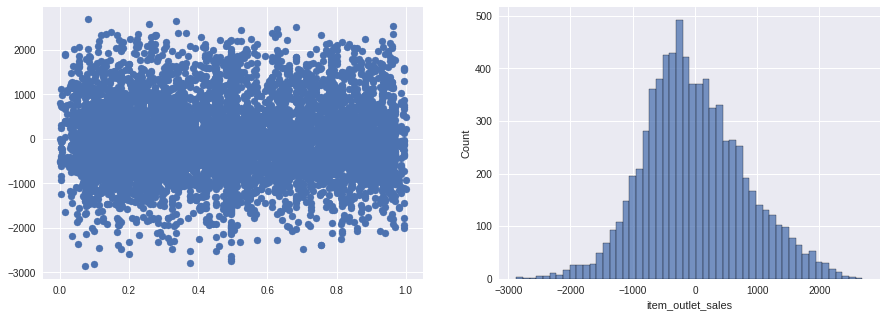

In [115]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.scatter(model.model.exog[:,1], model.resid)

plt.subplot(122)
sns.histplot(res);

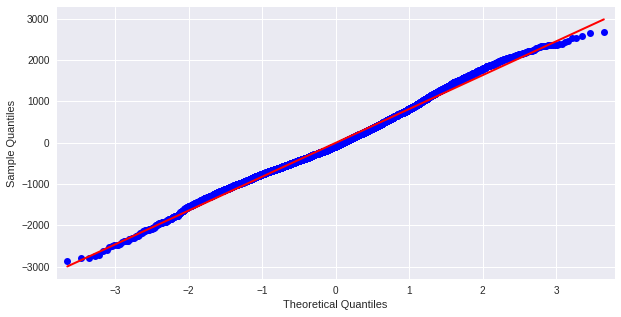

In [114]:
fig = sms.qqplot(res,line='s')
plt.show()

In [108]:
from scipy.stats import chisquare
stat, p = chisquare(res)
print(p)

if p > 0.05:
    print('Guassian')
else:
    print('Not Guassian')

1.0
Guassian
